In [1]:
import nltk
import urllib.request
from bs4 import BeautifulSoup

In [2]:
#obtener el contenido HTML de la pagina web 
res = urllib.request.urlopen("https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/que-es-el-web-scraping/")

In [3]:
#leer la informaicon obtenida, objeto HTML
html = res.read()

In [4]:
#limpiar el texto HTML capturado
#soup = BeautifulSoup(html,"html5lib")
soup = BeautifulSoup(html,"html.parser")

In [5]:
text = soup.get_text(strip=True)

In [6]:
text

'Web scraping: ¿qué es y para qué se utiliza esta técnica? - IONOSDigital GuidePáginas webCreación de páginas webDiseño webDesarrollo webDerecho  digitalHostingCMSBlogsCuestiones técnicasServidoresKnow HowConfiguraciónSeguridadHerramientasDominiosExtensiones de dominioGestión de dominiosNoticias sobre dominosConsejos sobre dominiosOnline MarketingVender en InternetMarketing para motores de búsquedaRedes socialesAnálisis webCorreo electrónicoE-mail marketingSeguridad correo electrónicoCuestiones técnicasProductos IONOSDominiosDominios: Registra y compra ahoraNuevos nombres de DominiosTransferencia de DominiosRegistro de dominio privadoInformación WhoisDomain CheckDominio gratisCorreo & OfficeDirección de correo electrónicoServidoresServidor CloudServidores DedicadosServidores VirtualesServidoresCloud EmpresarialSeguridadCertificado SSLSSL CheckerPáginas Web & HostingCrea tu página webPlantillas webTiendas OnlineHosting LinuxWordPress HostingWindows HostingHerramientasAnálisis WebAnálisi

### TOKENIZAR

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
#extraer tokens
tokens = word_tokenize(text,"spanish")

In [9]:
tokens = [word.lower() for word in tokens if word.isalpha() and len(word) > 1 ]

In [11]:
# tokens

- FRECUENCIA DE PALABRAS

In [12]:
def frecuenciaPalabras(tokens):
    freq = nltk.FreqDist(tokens)
    for palabra,valor in freq.items():
        print(f"{palabra}: {valor}")
    return freq


In [13]:
freq = frecuenciaPalabras(tokens)

web: 45
scraping: 21
es: 16
para: 48
qué: 8
se: 34
utiliza: 9
esta: 4
técnica: 1
ionosdigital: 1
guidepáginas: 1
webcreación: 1
de: 120
páginas: 10
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
sobre: 4
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
en: 37
internetmarketing: 1
motores: 2
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correo: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registra: 2
compra: 2
ahoranuevos: 2
nombres: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
tu: 13
página: 12


In [14]:
import matplotlib.pyplot as plt

def vizualizarTokens(tokens):
    tokens.plot(30,cumulative=False)

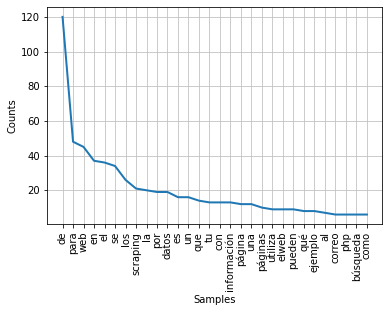

In [15]:
vizualizarTokens(freq)

### ELIMINAR PALABRAS DE PARADA

In [16]:
from nltk.corpus import stopwords

In [17]:
Tokens_limpios = tokens[:]

for token in tokens:
    if token in stopwords.words("spanish"):
        Tokens_limpios.remove(token)

In [19]:
#  Tokens_limpios

In [20]:
frecuencia_limpia = frecuenciaPalabras(Tokens_limpios)

web: 45
scraping: 21
utiliza: 9
técnica: 1
ionosdigital: 1
guidepáginas: 1
webcreación: 1
páginas: 10
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motores: 2
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correo: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registra: 2
compra: 2
ahoranuevos: 2
nombres: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
página: 12
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hos

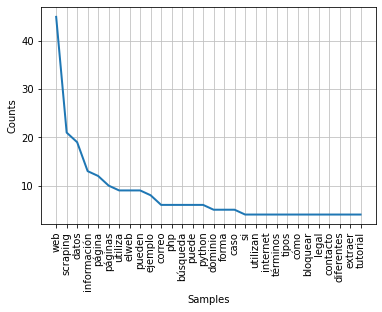

In [21]:
vizualizarTokens(frecuencia_limpia)

### DEFINICION Y EJEMPLO DE PALABRAS CON WORDNET

In [22]:
from nltk.corpus import wordnet #importa la base de datos wordnet
syn = wordnet.synsets("hot")

print(syn[0].definition())
print(syn[0].examples())

used of physical heat; having a high or higher than desirable temperature or giving off heat or feeling or causing a sensation of heat or burning
['hot stove', 'hot water', 'a hot August day', 'a hot stuffy room', "she's hot and tired", 'a hot forehead']


### SINONIMOS

In [23]:
# Ejemplo con la palabra "investment"
from nltk.corpus import wordnet

sinonimos = []

for syn in wordnet.synsets('investment'):#dentro de wordnet para la palabra investment
    for lemma in syn.lemmas():#extraer todos los lemas que contengan como sinonimo esa palabra
        sinonimos.append(lemma.name())
print(sinonimos)

['investing', 'investment', 'investment', 'investment_funds', 'investment', 'investment', 'investment', 'investment', 'investiture']


In [24]:
#reemplazar tokens sinonimos
#en tokens_limpios recorremos cada palabra y la reemplazamos por la palabra indicada si coincide

for ind, _ in enumerate(sinonimos):
    sin_tokens_limpios = [word.replace(sinonimos[ind],"investment") for word in Tokens_limpios]

In [27]:
# sin_tokens_limpios

### Reemplazar sinonimos Manuelamente

In [25]:
sinonimos = ["libertad","independencia"]

for ind,sin in enumerate(sinonimos):
    sin_tokens_limpios = [word.replace(sinonimos[ind],"libertad") for word in Tokens_limpios]

In [41]:
# sin_tokens_limpios

In [26]:
freq = frecuenciaPalabras(sin_tokens_limpios)

web: 45
scraping: 21
utiliza: 9
técnica: 1
ionosdigital: 1
guidepáginas: 1
webcreación: 1
páginas: 10
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motores: 2
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correo: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registra: 2
compra: 2
ahoranuevos: 2
nombres: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
página: 12
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hos

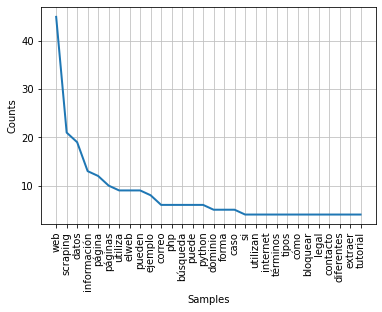

In [27]:
vizualizarTokens(freq)

### ANTONIMOS

In [28]:
from nltk.corpus import wordnet

antonyms = []

for syn in wordnet.synsets('good'):#recorra wordnet buscando la palabra 
    for l in syn.lemmas(): #asocie los lemas que tenga la palabra
  
        if l.antonyms():# si la palabra tiene antonimo
            antonyms.append(l.antonyms()[0].name())#almacenar el antonimo en el vector
print(antonyms)

['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


### DERIVACION REGRESIVA (WORD STEMMING ) := ENCONTRAR PALABRA RAIZ

In [29]:
# algoritmo porter de derivacion regrsiva, el mas utilizado --> importar modulo porterstemmer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() # se crea un objeto de derivacion regresiva, stemmer
print(stemmer.stem('working'))

print(stemmer.stem('drinking'))

work
drink


- PorterStemmer solo esta para palabras en ingles, para palabras en español se puede utilizar SnowballStemmer

In [30]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


En español

In [31]:
from nltk.stem import SnowballStemmer

stemmer_español = SnowballStemmer("spanish")#crearmos una instancia de l Snowballstemmer

print(stemmer_español.stem("trabajando"))
print(stemmer_español.stem("estudiando"))
print(stemmer_español.stem("Farriar"))

trabaj
estudi
farri


Aplicar al ejemplo

In [32]:
sin_tokens_limpios_stems = [stemmer_español.stem(token) for token in sin_tokens_limpios]

In [33]:
# sin_tokens_limpios_stems

In [34]:
freq_stems = frecuenciaPalabras(sin_tokens_limpios_stems)

web: 45
scraping: 21
utiliz: 20
tecnic: 3
ionosdigital: 1
guidepagin: 1
webcreacion: 1
pagin: 22
webdiseñ: 1
webdesarroll: 2
webderech: 1
digitalhostingcmsblogscuestion: 1
tecnicasservidoresknow: 1
howconfiguracionseguridadherramientasdominiosextension: 1
dominiogestion: 1
dominiosnotici: 1
dominosconsej: 1
dominiosonlin: 1
marketingvend: 1
internetmarketing: 1
motor: 3
busquedared: 1
socialesanalisis: 1
webcorre: 1
marketingsegur: 1
corre: 6
electronicocuestion: 1
tecnicasproduct: 1
ionosdominiosdomini: 2
registr: 2
compr: 2
ahoranuev: 2
nombr: 2
dominiostransferent: 1
dominiosregistr: 1
domini: 5
privadoinform: 1
whoisdomain: 1
checkdomini: 1
gratiscorre: 1
officedireccion: 2
electronicoservidoresservidor: 1
cloudservidor: 1
dedicadosservidor: 1
virtualesservidorescloud: 1
empresarialseguridadcertific: 1
sslssl: 1
checkerpagin: 1
hostingcre: 2
webplantill: 1
webtiend: 1
onlinehosting: 1
linuxwordpress: 1
hostingwindows: 1
hostingherramientasanalisis: 1
webanalisis: 3
seocr: 1
favicon

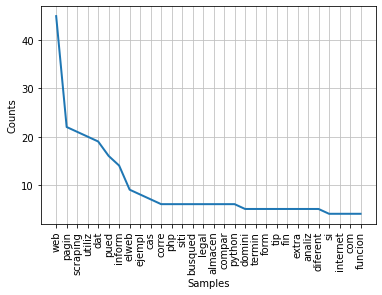

In [35]:
vizualizarTokens(freq_stems)

### LEMATIZAR PALABRAS

In [36]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

print(lemmtizer.lemmatize("increases"))

increase


In [37]:
print(lemmtizer.lemmatize("working",pos="v"))
#sustantivos de manera predeterminada, especificar 'v'  si se quieren los verbos

work


LEMATIZAR EN ESPAÑOL . INTALAR SPACY Y PAQUETES DE IDIOMAS

In [40]:
# Utilizar solo los tokens limpios, no solo con las raices (paso alternativo)
#tenemos que darle todas los tokens que tenemos en un string -> juntar en una cadena 
#separador.join(sin_tokens_limpio)

import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()#instancia

sin_tokens_limpios_lem = []

separador = " "
cadena = (separador.join(sin_tokens_limpios))#string


In [37]:
# cadena

In [41]:
cadena2 = nlp(cadena)

for token in cadena2:
    print(token.text,token.lemma_,token.pos_)# token, lema, indicador
    sin_tokens_limpios_lem.append(token.lemma_)# le añadimos cada uno de los lemas a la lista

fácilmenteregistro fácilmenteregistro PROPN
dominio dominio PROPN
privadodominio privadodominio PROPN
privacidad privacidad PROPN
whois whois PROPN
incluido incluir ADJ
gratisdominio gratisdominio PROPN
gratisinformación gratisinformación NOUN
whoisbusca whoisbusca PROPN
información información NOUN
dominiodomain dominiodomain PROPN
checkseguridadcertificado checkseguridadcertificado ADJ
sslmáxima sslmáxima PROPN
seguridad seguridad PROPN
accesso accesso PROPN
httpsssl httpsssl PROPN
checkercomprueba checkercomprueba PROPN
gratis gratis PROPN
cifrado cifrar ADJ
httpspáginas httpspáginas ADJ
web web PROPN
hostingcrea hostingcrea ADJ
página página PROPN
webcrea webcrea PROPN
fácilmente fácilmente ADV
página página ADJ
web web PROPN
negocioplantillas negocioplantillas NOUN
webmúltiples webmúltiples NOUN
diseños diseño ADJ
gran gran ADJ
variedad variedad NOUN
plantillastiendas plantillastiendas ADJ
onlinecrea onlinecrea VERB
propia propio DET
tienda tender NOUN
online online ADJ
rápidament

In [42]:
freq_lem = frecuenciaPalabras(sin_tokens_limpios_lem)


web: 45
scraping: 21
utilizar: 16
técnico: 3
ionosdigital: 1
guidepáginas: 1
webcreación: 1
página: 22
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motor: 3
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correar: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registrar: 2
comprar: 2
ahoranuevos: 2
nombre: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hostingwindow

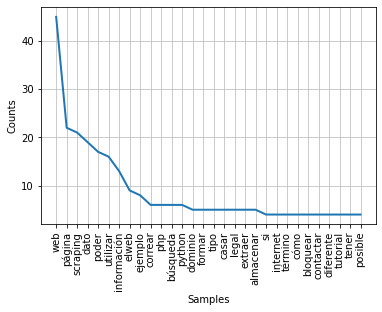

In [43]:
vizualizarTokens(freq_lem)